In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
#여러개의 범주형 자료 => 가변수 생성
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock', 'rock', 'pop', 'disco','pop']},
            columns=['m_id', 'm_gen'])

In [7]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [9]:
mm=pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
mm=df.join(mm.add_prefix('genre_'))
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


In [11]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

W0805 10:15:30.028603  7292 deprecation.py:323] From <ipython-input-12-8fff32bca56b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 10:15:30.028603  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 10:15:30.028603  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
I

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 10:15:31.410246  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 10:15:31.410246  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0805 10:15:32.133279  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#5만개 train 이미지(입력,레이블) => 모델
#1만개 test 이미지=> 모델 => 출력결과 정확도?

In [14]:
nb_classes=10 #분류결과의 종류 개수

In [16]:
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, nb_classes])
w=tf.Variable(tf.random_normal([28*28,nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
hf=tf.nn.softmax(tf.matmul(x,w)+b)
cost= tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct=tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
#에폭(전체 데이터를 1번트레이닝 -> 1에폭)
training_epochs=15
batch_size=100

W0805 10:50:11.692214  7292 deprecation.py:323] From <ipython-input-16-f2a014c5404c>:9: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


Epoch:    1 cost: 2.600500018
Epoch:    2 cost: 1.069430390
Epoch:    3 cost: 0.859196381
Epoch:    4 cost: 0.756205606
Epoch:    5 cost: 0.691342896
Epoch:    6 cost: 0.644927541
Epoch:    7 cost: 0.609557256
Epoch:    8 cost: 0.581280538
Epoch:    9 cost: 0.558019187
Epoch:   10 cost: 0.538356307
Epoch:   11 cost: 0.521609783
Epoch:   12 cost: 0.507193080
Epoch:   13 cost: 0.494378634
Epoch:   14 cost: 0.482548437
Epoch:   15 cost: 0.472194156
learning finished
accuracy : 0.8948
Label: [0]
prediction: [0]


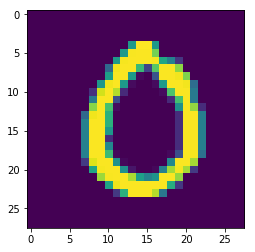

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in  range(training_epochs):#5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) #5만/100
        for i in range(total_batch): #500번(1번에 100개씩 이미지를 읽겠다)
            batch_xs, batch_ys=mnist.train.next_batch(batch_size)
            cv, _=sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost+=cv/total_batch #  100데이터코스트/500
        print("Epoch:", '%4d' % (epoch+1),'cost:', '{:.9f}'.format(avg_cost))    
    print("learning finished")# 1, 3, 7, 10, 14   35/5=7
    print("accuracy :", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    r=random.randint(0, mnist.test.num_examples-1)
    print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))    
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()
    
        